In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as ta
from talib import abstract
import yfinance as yfin

In [39]:
# data_path = '/Users/xinc./Documents/GitHub/Quant_idea/data/0804 大社課 TXF 1m.csv'
df = yfin.download('^TWII', start = '2020-5-1', end = '2024-7-31')
# df = pd.read_csv(data_path)
# df.index = pd.to_datetime(df['datetime'])
# df = df.drop(columns = ['Unnamed: 0', 'datetime', 'Date', 'Time'])
# df.columns = ['open', 'high', 'low', 'close', 'volume']
df.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
df

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2020-05-04,10781.509766,10781.509766,10658.500000,10720.480469,10720.480469,3113100
2020-05-05,10756.950195,10833.530273,10735.009766,10774.610352,10774.610352,2817200
2020-05-06,10771.089844,10828.730469,10708.099609,10774.980469,10774.980469,3137600
2020-05-07,10778.530273,10890.870117,10775.160156,10842.919922,10842.919922,2849600
2020-05-08,10883.219727,10970.700195,10883.219727,10901.419922,10901.419922,3169900
...,...,...,...,...,...,...
2024-07-22,22818.859375,22818.859375,22130.880859,22256.990234,22256.990234,5194300
2024-07-23,22514.750000,22871.839844,22514.750000,22871.839844,22871.839844,3915800
2024-07-26,22206.929688,22206.929688,21889.609375,22119.210938,22119.210938,4132300


In [40]:
#parameters
data = df['close']
a0 = 0.5
a1 = 0.25
a2 = .25
b1 = -0.5
b2 = .25

def low_pass_filter(data, a0, a1, a2, b1, b2):
    y = np.zeros(len(data))
    for n in range(2, len(data)):
        y[n] = a0 * data[n] + a1 * data[n - 1] + a2 * data[n - 2] - b1 * y[n - 1] - b2 * y[n - 2]
    return y

df['llt'] = low_pass_filter(data, a0, a1, a2, b1, b2)
df['llt_slope'] = np.nan
for i in range(1, len(df)):
    df['llt_slope'][i] = df['llt'][i] - df['llt'][i - 1]

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/2350771024.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[n] = a0 * data[n] + a1 * data[n - 1] + a2 * data[n - 2] - b1 * y[n - 1] - b2 * y[n - 2]
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/2350771024.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['llt_slope'][i] = df['llt'][i] - df['llt'][i - 1]
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/2350771024.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently thi

In [41]:
signal = np.zeros(len(df))
buyin = df['llt_slope'] > 0
soldout = df['llt_slope'] < 0
for i in range(len(df)):
    if buyin[i]:
        signal[i] = 1
    elif soldout[i]:
        signal[i] = -1

df['signal'] = signal
df

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/1438565416.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if buyin[i]:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/1438565416.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif soldout[i]:


,open,high,low,close,adj_close,volume,llt,llt_slope,signal
Date,,,,,,,,,
2020-05-04,10781.509766,10781.509766,10658.500000,10720.480469,10720.480469,3113100,0.000000,NaN,0.0
2020-05-05,10756.950195,10833.530273,10735.009766,10774.610352,10774.610352,2817200,0.000000,0.000000,0.0
2020-05-06,10771.089844,10828.730469,10708.099609,10774.980469,10774.980469,3137600,10761.262939,10761.262939,1.0
2020-05-07,10778.530273,10890.870117,10775.160156,10842.919922,10842.919922,2849600,16189.489136,5428.226196,1.0
2020-05-08,10883.219727,10970.700195,10883.219727,10901.419922,10901.419922,3169900,16259.613892,70.124756,1.0
...,...,...,...,...,...,...,...,...,...
2024-07-22,22818.859375,22818.859375,22130.880859,22256.990234,22256.990234,5194300,30332.941692,-722.845329,-1.0
2024-07-23,22514.750000,22871.839844,22514.750000,22871.839844,22871.839844,3915800,30120.006513,-212.935179,-1.0
2024-07-26,22206.929688,22206.929688,21889.609375,22119.210938,22119.210938,4132300,29818.580822,-301.425691,-1.0


In [42]:
df['position'] = df['signal'].shift(1)
df[['close', 'signal', 'position']].dropna()
df['ret'] = df['close'].pct_change()
df['cum_ret'] = df['ret'].cumsum()

In [43]:
strategy_ret = np.zeros(len(df))

for i in range(len(df)):
    if df['position'][i] == 1:
        strategy_ret[i] = df['ret'][i] * df['position'][i]
    elif df['position'][i] == -1:
        strategy_ret[i] = df['ret'][i] * df['position'][i]

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/1482440230.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['position'][i] == 1:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/1482440230.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['position'][i] == -1:
/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_38438/1482440230.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

In [44]:
cum_strategy_ret = strategy_ret.cumsum()
df['cum_strategy_ret'] = cum_strategy_ret
df

,open,high,low,close,adj_close,volume,llt,llt_slope,signal,position,ret,cum_ret,cum_strategy_ret
Date,,,,,,,,,,,,,
2020-05-04,10781.509766,10781.509766,10658.500000,10720.480469,10720.480469,3113100,0.000000,NaN,0.0,NaN,NaN,NaN,0.000000
2020-05-05,10756.950195,10833.530273,10735.009766,10774.610352,10774.610352,2817200,0.000000,0.000000,0.0,0.0,0.005049,0.005049,0.000000
2020-05-06,10771.089844,10828.730469,10708.099609,10774.980469,10774.980469,3137600,10761.262939,10761.262939,1.0,0.0,0.000034,0.005084,0.000000
2020-05-07,10778.530273,10890.870117,10775.160156,10842.919922,10842.919922,2849600,16189.489136,5428.226196,1.0,1.0,0.006305,0.011389,0.006305
2020-05-08,10883.219727,10970.700195,10883.219727,10901.419922,10901.419922,3169900,16259.613892,70.124756,1.0,1.0,0.005395,0.016784,0.011701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,22818.859375,22818.859375,22130.880859,22256.990234,22256.990234,5194300,30332.941692,-722.845329,-1.0,-1.0,-0.026773,0.786278,0.474033
2024-07-23,22514.750000,22871.839844,22514.750000,22871.839844,22871.839844,3915800,30120.006513,-212.935179,-1.0,-1.0,0.027625,0.813903,0.446408
2024-07-26,22206.929688,22206.929688,21889.609375,22119.210938,22119.210938,4132300,29818.580822,-301.425691,-1.0,-1.0,-0.032906,0.780996,0.479314


<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

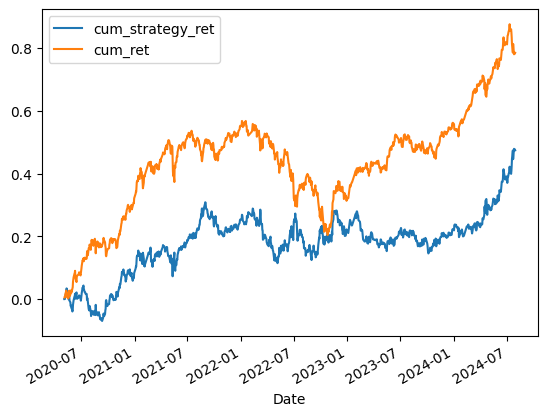

In [45]:
plt.figure(figsize = (12, 6))
df[['cum_strategy_ret', 'cum_ret']].plot()